<a href="https://colab.research.google.com/github/ssk-12/MachineLearning/blob/main/Multiple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Multiple Linear Regression

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Importing Data Set

In [ ]:
datatest = pd.read_csv("/content/drive/MyDrive/FML/Dataset_master.xlsx - Covid_data Multiple Linear Regr.csv")
datatest

,age,Body Temp,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
0,10,Moderate,0,97,127181
1,80,High,0,92,61004
2,10,Low,0,97,111911
3,81,High,4,75,39010
4,12,Moderate,0,97,110911
...,...,...,...,...,...
65,76,High,4,80,39010
66,35,Moderate,0,92,91141
67,13,Moderate,0,94,112101
68,82,High,3,73,42010


In [ ]:
datatest.shape

(70, 5)

In [ ]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           70 non-null     int64 
 1   Body Temp                     70 non-null     object
 2   Chronic disease               70 non-null     int64 
 3   Blood O2 Level in Percentage  70 non-null     int64 
 4   Anti Bodies                   70 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.9+ KB


In [ ]:
x = datatest.iloc[:, :-1].values
y = datatest.iloc[:, -1].values

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
x

array([[0.0, 0.0, 1.0, 10, 0, 97],
       [1.0, 0.0, 0.0, 80, 0, 92],
       [0.0, 1.0, 0.0, 10, 0, 97],
       [1.0, 0.0, 0.0, 81, 4, 75],
       [0.0, 0.0, 1.0, 12, 0, 97],
       [0.0, 1.0, 0.0, 18, 0, 66],
       [0.0, 0.0, 1.0, 13, 0, 93],
       [1.0, 0.0, 0.0, 94, 4, 64],
       [1.0, 0.0, 0.0, 86, 2, 76],
       [0.0, 0.0, 1.0, 20, 0, 92],
       [0.0, 0.0, 1.0, 15, 0, 94],
       [0.0, 0.0, 1.0, 15, 0, 92],
       [0.0, 1.0, 0.0, 16, 0, 92],
       [0.0, 0.0, 1.0, 17, 0, 93],
       [0.0, 0.0, 1.0, 18, 0, 93],
       [0.0, 0.0, 1.0, 19, 0, 92],
       [0.0, 0.0, 1.0, 19, 0, 89],
       [0.0, 0.0, 1.0, 12, 0, 97],
       [0.0, 0.0, 1.0, 20, 0, 93],
       [0.0, 0.0, 1.0, 24, 0, 92],
       [0.0, 0.0, 1.0, 25, 0, 93],
       [1.0, 0.0, 0.0, 59, 2, 68],
       [1.0, 0.0, 0.0, 63, 1, 66],
       [0.0, 0.0, 1.0, 25, 1, 62],
       [1.0, 0.0, 0.0, 26, 0, 94],
       [0.0, 1.0, 0.0, 26, 0, 97],
       [0.0, 0.0, 1.0, 28, 0, 99],
       [1.0, 0.0, 0.0, 59, 0, 69],
       [0.0, 0.0, 1.

## Splitting into test and training set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision= 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[ 60966.328  59994.   ]
 [106235.3   127181.   ]
 [ 63661.505  50104.   ]
 [105026.008 110911.   ]
 [ 63389.591  62019.   ]
 [ 98970.192  97101.   ]
 [102298.084 101000.   ]
 [ 88972.481  90015.   ]
 [ 82934.435  84008.   ]
 [105145.481 100000.   ]
 [ 83479.206  75012.   ]
 [ 98665.529  98101.   ]
 [103507.375 112101.   ]
 [ 96014.974  99110.   ]
 [ 63142.01   67019.   ]
 [ 82040.104  83891.   ]
 [ 58412.388  56095.   ]
 [ 88681.854  90124.   ]
 [ 40437.637  41891.   ]
 [ 71882.704  73010.   ]
 [ 98356.189  98081.   ]
 [ 85518.589  90001.   ]
 [ 86866.973  88012.   ]
 [ 92914.375  93091.   ]
 [ 29395.261  37914.   ]
 [ 69280.779  63091.   ]
 [ 74751.864  78004.   ]
 [ 85657.681  87005.   ]]


## Visualizing results

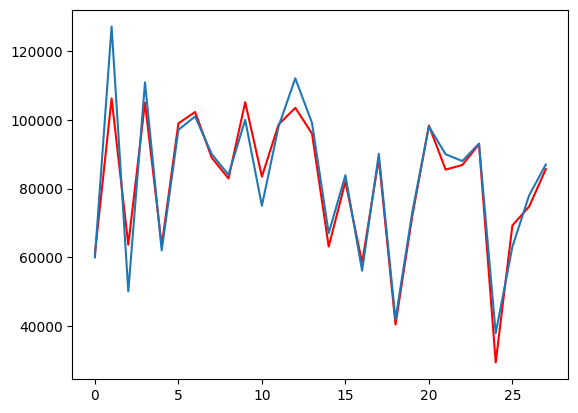

In [ ]:
plt.plot(y_pred,color="red")
plt.plot(y_test)
plt.show()